In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from matplotlib import pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


/tmp/ipykernel_42/756880868.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [3]:
test_df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
# df['IDGroup'] = df['PassengerId'].str.split('_').str[1].astype(int)

In [5]:
df.groupby(['HomePlanet'], as_index=False)['Transported'].mean()

,HomePlanet,Transported
0,Earth,0.423946
1,Europa,0.658846
2,Mars,0.523024


In [6]:
df.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [7]:
profile = ProfileReport(df, title='Spaceship Titanic')

In [8]:
# profile

In [9]:
df[df.isna().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


In [10]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [11]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [12]:
def preprocessing(df):    
    df['HomePlanet'].fillna('Missing', inplace=True)
    
    df['CryoSleep'].fillna('Missing', inplace=True)
    
    split_cabin = df['Cabin'].str.split('/', expand=True)
    df['Deck'] = split_cabin[0]
    df['Side'] = split_cabin[2]
    df['Deck'].fillna('Missing', inplace=True)
    df['Side'].fillna('Missing', inplace=True)
    df.drop(['Cabin'], axis=1, inplace=True)
    
    df['Destination'].fillna('Missing', inplace=True)
    
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    
    df['VIP'].fillna('Missing', inplace=True)
    
    df['RoomService'].fillna(0, inplace=True)
    df['FoodCourt'].fillna(0, inplace=True)
    df['ShoppingMall'].fillna(0, inplace=True)
    df['Spa'].fillna(0, inplace=True)
    df['VRDeck'].fillna(0, inplace=True)
    
    df.drop('Name', axis=1, inplace=True)

In [13]:
abt = df.copy()

In [14]:
preprocessing(abt)

In [15]:
df.info()
#8693 unique records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [17]:
X = abt.drop(['Transported', 'PassengerId'], axis=1)
X = pd.get_dummies(X, dtype=int)
y = abt['Transported']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

<Axes: xlabel='Transported', ylabel='count'>

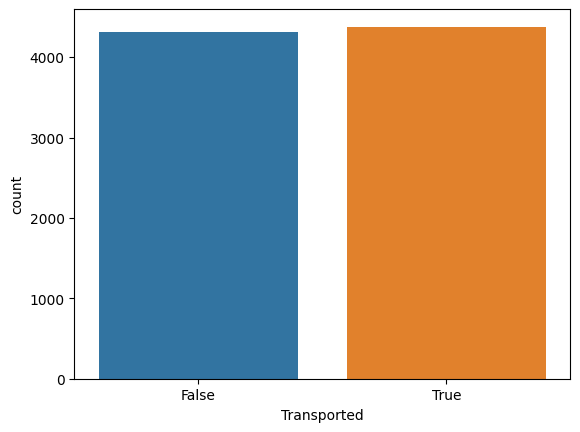

In [19]:
sns.countplot(x='Transported', data=df)

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [40]:
pipelines = {
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=69)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=69)),
}

In [43]:
grid = {
    'rf': {
        'randomforestclassifier__n_estimators': [100, 200, 300]
    },
    'gb': {
        'gradientboostingclassifier__n_estimators': [100, 200, 300]
    }
}


In [44]:
# create a blank dictionary to hold blank models
fit_models = {}
# loop through all the algos
for algo, pipeline in pipelines.items():
    print(f'Training the {algo} model...')
    #crete new grid search cv xlass
    model = GridSearchCV(pipeline, grid[algo], n_jobs=-1, cv=10)
    #train the model
    model.fit(X_train, y_train)
    #store results inside dictionary
    fit_models[algo] = model

Training the rf model...
Training the gb model...


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [46]:
#evaluate performance of model
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    accuracy = accuracy_score(y_test, yhat)
    precision = precision_score(y_test, yhat)
    recall = recall_score(y_test, yhat)
    print(f'Metrics for {algo}: accuracy -- {accuracy}, recall -- {recall}, precision -- {precision}' )

Metrics for rf: accuracy -- 0.7944785276073619, recall -- 0.7669753086419753, precision -- 0.8094462540716613
Metrics for gb: accuracy -- 0.8075153374233128, recall -- 0.8479938271604939, precision -- 0.7827635327635327


In [47]:
import pickle

In [48]:
with open('gb.pkl', 'wb') as f:
    pickle.dump(fit_models['gb'], f)

In [49]:
with open('gb.pkl', 'rb') as f:
    reloaded_model = pickle.load(f)

In [50]:
reloaded_model

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=69))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__n_estimators': [100, 200,
                                                                      300]})

In [51]:
# deep copy
abt_test = test_df.copy()
# run through the preprocessing pipieline
preprocessing(abt_test)
# one hot encode categorical variables
abt_test = pd.get_dummies(abt_test.drop('PassengerId', axis=1))

In [52]:
abt_test.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'HomePlanet_Missing', 'CryoSleep_False', 'CryoSleep_True',
       'CryoSleep_Missing', 'Destination_55 Cancri e', 'Destination_Missing',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False',
       'VIP_True', 'VIP_Missing', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_Missing', 'Deck_T', 'Side_Missing',
       'Side_P', 'Side_S'],
      dtype='object')

In [53]:
len(X.columns)

32

In [54]:
len(abt_test.columns)

32

In [55]:
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Missing,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_Missing,Deck_T,Side_Missing,Side_P,Side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [57]:
yhat_test = fit_models['gb'].predict(abt_test)

In [58]:
submission = pd.DataFrame([test_df['PassengerId'], yhat_test]).T
submission.columns = ['PassengerId', 'Transported']

In [59]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [60]:
submission.to_csv('submission.csv', index=False)
print("Submission saved.")

Submission saved.
